## Price and Bathrooms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_excel("D:\\ML\\dataset\\Linear Regression.xlsx")

In [4]:
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [5]:
df = dataset.drop(columns=['sqft_living','bedrooms','floors'])

In [6]:
df.head()

,price,bathrooms
0,221900,1.00
1,538000,2.25
2,180000,1.00
3,604000,3.00
4,510000,2.00


In [7]:
df.dtypes

price          int64
bathrooms    float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21613 non-null  int64  
 1   bathrooms  21613 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002329D93BB88>,
      dtype=object)

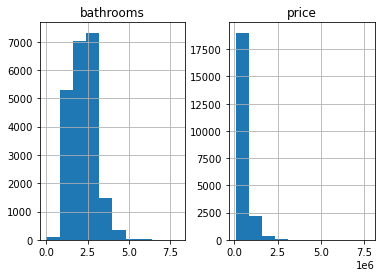

In [11]:
df.hist()

In [12]:
df.corr()

,price,bathrooms
price,1.000000,0.525138
bathrooms,0.525138,1.000000


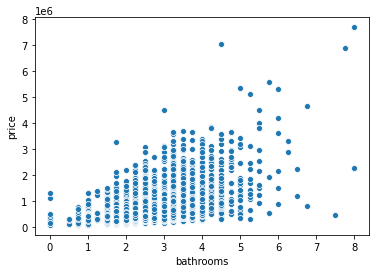

In [13]:
sns.scatterplot(df['bathrooms'],df['price'])

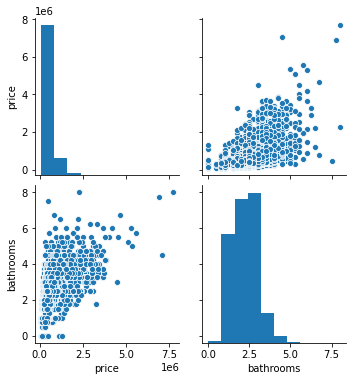

In [14]:
sns.pairplot(df)

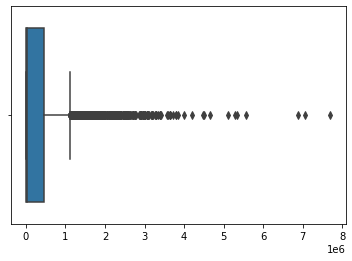

In [16]:
sns.boxplot(df)

In [33]:
## independent and dependent features
X = df.iloc[:,1:]   #  independent feature
y = df.iloc[:,:-1]  # dependent feature

In [34]:
X.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [35]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


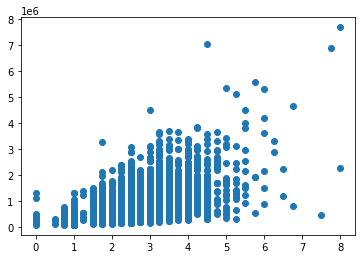

In [36]:
plt.scatter(X,y)
plt.show()

In [43]:
## train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Model Buliding

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
linear = LinearRegression()

## Train the model

In [47]:
linear.fit(X_train,y_train)

LinearRegression()

In [48]:
linear.coef_   # find the Slop M

array([[248840.77633797]])

In [50]:
linear.intercept_    # Find the Constant Value C

array([14640.2044812])

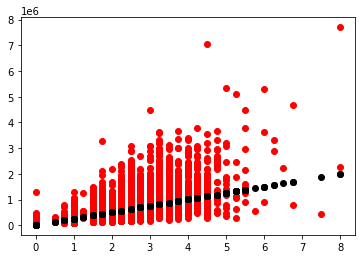

In [54]:
plt.scatter(X_train,y_train,color='red')
plt.scatter(X_train,linear.predict(X_train),color='black')
plt.show()

## Test the model

In [51]:
y_pred = linear.predict(X_test)

In [52]:
y_pred

array([[387901.36898816],
       [823372.7275796 ],
       [201270.78673468],
       ...,
       [636742.14532613],
       [387901.36898816],
       [263480.98081917]])

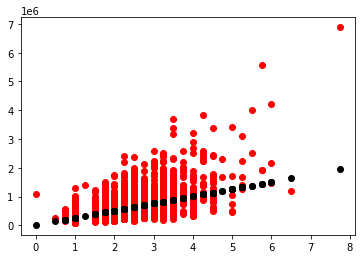

In [55]:
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_test,linear.predict(X_test),color='black')
plt.show()

## Estimate Cost

In [56]:
from sklearn.metrics import mean_squared_error,r2_score

In [58]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
r_square = r2_score(y_test,y_pred)
print("RMSE values:",RMSE)
print("R^2 Values:",r_square)

RMSE values: 307726.0520109887
R^2 Values: 0.28715065698286124


# unseen predictor

In [63]:
unseen_pred = linear.predict(np.array([[5.00]]))
print("The unseen predictor values:",unseen_pred)

The unseen predictor values: [[1258844.08617105]]


In [60]:
df.head()

,price,bathrooms
0,221900,1.00
1,538000,2.25
2,180000,1.00
3,604000,3.00
4,510000,2.00
